In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
import random

import sys
import matplotlib
import sklearn
import numpy
import keras
import tensorflow as tf 
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Convolution2D, MaxPool2D
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import Callback

Using TensorFlow backend.


In [2]:
print('Versão Python ', sys.version)
print('Versão Numpy ', numpy.version.version)
print('Versão Pandas ', pd.__version__)
print('Versão Matplotlib ', matplotlib.__version__)
print('Versão Sklearn ', sklearn.__version__)
print('Versão Keras', keras.__version__)
print('Versão TensorFlow', tf.__version__)

Versão Python  3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:18:16) [MSC v.1916 64 bit (AMD64)]
Versão Numpy  1.17.4
Versão Pandas  0.25.3
Versão Matplotlib  3.1.2
Versão Sklearn  0.22.1
Versão Keras 2.3.1
Versão TensorFlow 2.0.0


In [3]:
IdLookupTable = pd.read_csv('IdLookupTable.csv')
SampleSubmission = pd.read_csv('SampleSubmission.csv')
training = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')

In [4]:
training = training.dropna()

In [5]:
training['Image'] = training['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

In [6]:
type(training['Image'][0])

numpy.ndarray

In [7]:
X = np.asarray([training['Image']], dtype=np.uint8).reshape(training.shape[0],96,96,1)

In [8]:
y = training.drop(['Image'], axis=1)

In [9]:
y_ndarray = y.to_numpy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ndarray, test_size=0.3, random_state=42)

In [11]:
model = Sequential()

In [12]:
def add_model(model, filters, maxpooling, *inputshape):   
    if inputshape:
        model.add(Convolution2D(filters, (5,5), padding='same', use_bias=False, input_shape=(96,96,1)))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())
    else:
      if maxpooling:
        model.add(Convolution2D(filters, (5,5), padding='same', use_bias=False))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())
        model.add(MaxPool2D(pool_size=(2, 2)))
      else:
        model.add(Convolution2D(filters, (5,5), padding='same', use_bias=False))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())

In [13]:
add_model(model, 32, False, True)

In [14]:
add_model(model, 32, True)
add_model(model, 64, False)
add_model(model, 64, True)
add_model(model, 128, False)
add_model(model, 128, True)
add_model(model, 256, False)
add_model(model, 256, True)
add_model(model, 512, False)
add_model(model, 512, True)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))

In [15]:
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae', 'acc'])

In [16]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath = 'layer10_epoc100_kernel5p5_drop0p1_mean_squared_error.hdf5', monitor='val_mae', verbose=1, save_best_only=False)

In [17]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.02, callbacks=[checkpointer])

Train on 1468 samples, validate on 30 samples
Epoch 1/100
1468/1468 [==============================] - 374s 254ms/step - loss: 205.4005 - mae: 8.9948 - acc: 0.3869 - val_loss: 8405.2285 - val_mae: 75.6212 - val_acc: 0.7333

Epoch 00001: saving model to layer10_epoc100_kernel5p5_drop0p1_mean_squared_error.hdf5
Epoch 2/100
1468/1468 [==============================] - 378s 258ms/step - loss: 31.8833 - mae: 4.4372 - acc: 0.4986 - val_loss: 1602.8215 - val_mae: 35.7616 - val_acc: 0.7667

Epoch 00002: saving model to layer10_epoc100_kernel5p5_drop0p1_mean_squared_error.hdf5
Epoch 3/100
1468/1468 [==============================] - 392s 267ms/step - loss: 26.4998 - mae: 4.0415 - acc: 0.5170 - val_loss: 444.1317 - val_mae: 18.8360 - val_acc: 0.7667

Epoch 00003: saving model to layer10_epoc100_kernel5p5_drop0p1_mean_squared_error.hdf5
Epoch 4/100
1468/1468 [==============================] - 392s 267ms/step - loss: 22.9117 - mae: 3.7400 - acc: 0.5259 - val_loss: 45.2890 - val_mae: 5.7359 - val_a

1468/1468 [==============================] - 403s 275ms/step - loss: 6.5479 - mae: 1.9761 - acc: 0.7248 - val_loss: 3.0984 - val_mae: 1.3293 - val_acc: 0.8667

Epoch 00032: saving model to layer10_epoc100_kernel5p5_drop0p1_mean_squared_error.hdf5
Epoch 33/100
1468/1468 [==============================] - 403s 275ms/step - loss: 6.6767 - mae: 1.9904 - acc: 0.7432 - val_loss: 2.8528 - val_mae: 1.2363 - val_acc: 0.8333

Epoch 00033: saving model to layer10_epoc100_kernel5p5_drop0p1_mean_squared_error.hdf5
Epoch 34/100
1468/1468 [==============================] - 400s 272ms/step - loss: 6.3566 - mae: 1.9294 - acc: 0.7296 - val_loss: 7.4758 - val_mae: 2.1521 - val_acc: 0.7667

Epoch 00034: saving model to layer10_epoc100_kernel5p5_drop0p1_mean_squared_error.hdf5
Epoch 35/100
1468/1468 [==============================] - 418s 285ms/step - loss: 7.2770 - mae: 2.0790 - acc: 0.7296 - val_loss: 6.1024 - val_mae: 2.1218 - val_acc: 0.8667

Epoch 00035: saving model to layer10_epoc100_kernel5p5_drop0


Epoch 00063: saving model to layer10_epoc100_kernel5p5_drop0p1_mean_squared_error.hdf5
Epoch 64/100
1468/1468 [==============================] - 394s 269ms/step - loss: 5.0951 - mae: 1.7389 - acc: 0.7793 - val_loss: 3.0155 - val_mae: 1.3206 - val_acc: 0.8667

Epoch 00064: saving model to layer10_epoc100_kernel5p5_drop0p1_mean_squared_error.hdf5
Epoch 65/100
1468/1468 [==============================] - 410s 279ms/step - loss: 4.9261 - mae: 1.7011 - acc: 0.7963 - val_loss: 4.7089 - val_mae: 1.8019 - val_acc: 0.9333

Epoch 00065: saving model to layer10_epoc100_kernel5p5_drop0p1_mean_squared_error.hdf5
Epoch 66/100
1468/1468 [==============================] - 431s 294ms/step - loss: 4.9041 - mae: 1.7085 - acc: 0.7963 - val_loss: 7.2757 - val_mae: 2.3616 - val_acc: 0.8333

Epoch 00066: saving model to layer10_epoc100_kernel5p5_drop0p1_mean_squared_error.hdf5
Epoch 67/100
1468/1468 [==============================] - 428s 291ms/step - loss: 5.3195 - mae: 1.7818 - acc: 0.7916 - val_loss: 4.1

1468/1468 [==============================] - 407s 277ms/step - loss: 4.7647 - mae: 1.6766 - acc: 0.8025 - val_loss: 2.9486 - val_mae: 1.2533 - val_acc: 0.8000

Epoch 00095: saving model to layer10_epoc100_kernel5p5_drop0p1_mean_squared_error.hdf5
Epoch 96/100
1468/1468 [==============================] - 390s 265ms/step - loss: 4.4789 - mae: 1.6255 - acc: 0.8324 - val_loss: 2.2454 - val_mae: 1.0782 - val_acc: 0.8000

Epoch 00096: saving model to layer10_epoc100_kernel5p5_drop0p1_mean_squared_error.hdf5
Epoch 97/100
1468/1468 [==============================] - 389s 265ms/step - loss: 4.3431 - mae: 1.6079 - acc: 0.8181 - val_loss: 5.3209 - val_mae: 1.9337 - val_acc: 0.8000

Epoch 00097: saving model to layer10_epoc100_kernel5p5_drop0p1_mean_squared_error.hdf5
Epoch 98/100
1468/1468 [==============================] - 390s 265ms/step - loss: 4.1959 - mae: 1.5730 - acc: 0.8297 - val_loss: 4.2929 - val_mae: 1.6594 - val_acc: 0.8333

Epoch 00098: saving model to layer10_epoc100_kernel5p5_drop0

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.1368271777191636
Test accuracy: 1.3233193159103394


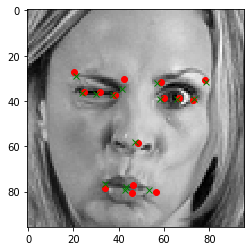

In [19]:
test['Image'] = test['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))
test_X = np.asarray([test['Image']], dtype=np.uint8).reshape(test.shape[0],96,96,1)
train_predicts = model.predict(X_train)

plt.imshow(X_train[0].reshape((96,96)), cmap='gray')

for i in range(1,31,2):
    plt.plot(train_predicts[0][i-1], train_predicts[0][i], 'ro')
    plt.plot(y_train[0][i-1], y_train[0][i], 'x', color='green')

plt.show()

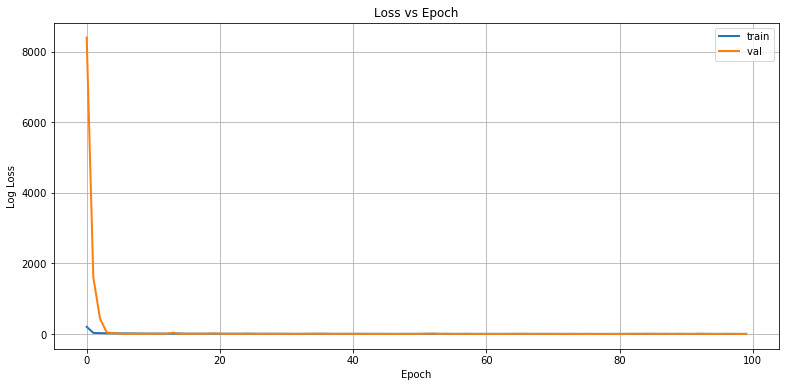

<Figure size 1440x1080 with 0 Axes>

In [27]:
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'], linewidth=2, label="train")
plt.plot(history.history['val_loss'], linewidth=2, label="val ")
plt.legend()
plt.title('Loss vs Epoch')
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
fig= plt.figure(figsize=(20,15))
plt.show()

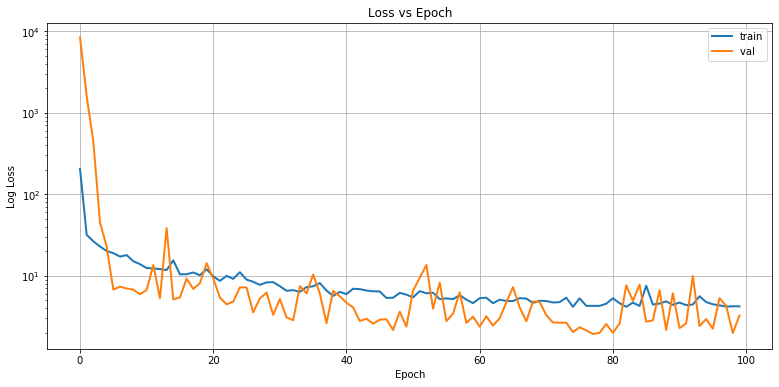

<Figure size 1440x1080 with 0 Axes>

In [26]:
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'], linewidth=2, label="train")
plt.plot(history.history['val_loss'], linewidth=2, label="val ")
plt.legend()
plt.title('Loss vs Epoch')
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.yscale("log")
fig= plt.figure(figsize=(20,15))
plt.show()

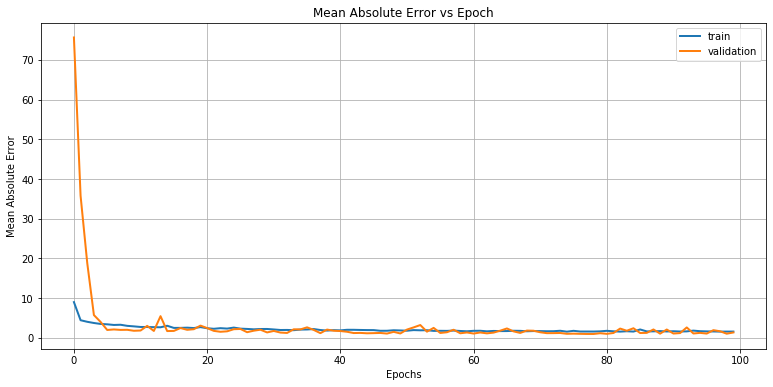

In [28]:
plt.figure(figsize=(13,6))
plt.plot(history.history['mae'], linewidth=2)
plt.plot(history.history['val_mae'], linewidth=2)
plt.title('Mean Absolute Error vs Epoch')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.grid()
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

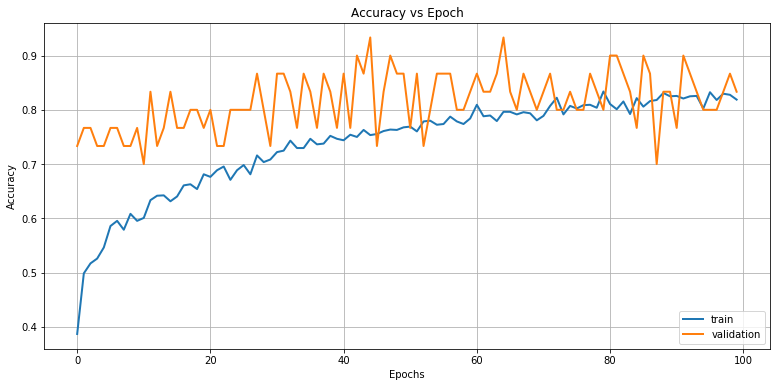

In [29]:
plt.figure(figsize=(13,6))
plt.plot(history.history['acc'], linewidth=2)
plt.plot(history.history['val_acc'], linewidth=2)
plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [30]:
predict = model.predict(test_X)

In [31]:
header = list(y.columns)

In [32]:
df_predict = pd.DataFrame(predict, columns = header)

In [33]:
for i in range(IdLookupTable.shape[0]):
    IdLookupTable.Location[i] = df_predict.loc[IdLookupTable.ImageId[i]-1][IdLookupTable.FeatureName[i]]

c:\users\alexandre\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
SampleSubmission.Location = IdLookupTable.Location

In [35]:
SampleSubmission.to_csv('submission_100_epochs_kernel5x5_mean_squared_error.csv', index=False)